In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
#import seqlearn

In [3]:
## global pyplot settings -- can be changed for a specific instance
plt.rcParams['figure.figsize'] = (8, 5.28) 
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.titleweight"] = 600

sns.set_color_codes("pastel")

In [4]:
## reading in files
mon = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
tues = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
wed = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv", encoding="utf-8")
thur_web = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", encoding="utf-8")
thur_inf = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", encoding="utf-8")
frid_ddos = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", encoding="utf-8")
frid_port = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", encoding="utf-8")
frid_morn = pd.read_csv("/home/lly/DataSecurity/datasets/CIC-IDS-2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv", encoding="utf-8")

In [5]:
# Presentation of data from each day 
print("The size of the traffic after removing NAs on Monday is {} rows and {} columns".format(mon.shape[0],mon.shape[1]))
print("The size of the traffic after removing NAs on Tuesday is {} rows and {} columns".format(tues.shape[0],tues.shape[1]))
print("The size of the traffic after removing NAs on Wednesday is {} rows and {} columns".format(wed.shape[0],wed.shape[1]))
print("The size of the traffic after removing NAs on Thursday is {} rows and {} columns".format(thur_web.shape[0] + thur_inf.shape[0],thur_web.shape[1]))
print("The size of the traffic after removing NAs on Friday is {} rows and {} columns".format(frid_ddos.shape[0] + frid_port.shape[0] + frid_morn.shape[0],frid_ddos.shape[1]))

The size of the traffic after removing NAs on Monday is 529918 rows and 79 columns
The size of the traffic after removing NAs on Tuesday is 445909 rows and 79 columns
The size of the traffic after removing NAs on Wednesday is 692703 rows and 79 columns
The size of the traffic after removing NAs on Thursday is 458968 rows and 79 columns
The size of the traffic after removing NAs on Friday is 703245 rows and 79 columns


In [6]:
### all labels are of numerical type, despite Label column
mon.info()  # same format applies to other files

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529918 entries, 0 to 529917
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             529918 non-null  int64  
 1    Flow Duration                529918 non-null  int64  
 2    Total Fwd Packets            529918 non-null  int64  
 3    Total Backward Packets       529918 non-null  int64  
 4   Total Length of Fwd Packets   529918 non-null  int64  
 5    Total Length of Bwd Packets  529918 non-null  int64  
 6    Fwd Packet Length Max        529918 non-null  int64  
 7    Fwd Packet Length Min        529918 non-null  int64  
 8    Fwd Packet Length Mean       529918 non-null  float64
 9    Fwd Packet Length Std        529918 non-null  float64
 10  Bwd Packet Length Max         529918 non-null  int64  
 11   Bwd Packet Length Min        529918 non-null  int64  
 12   Bwd Packet Length Mean       529918 non-nul

In [7]:
# searching for NA values - empty "" are not considered NA - but that is of no concern in this dataset 
pd.options.mode.use_inf_as_na = True ## so that inf is also treated as NA value
print("mon NA values")
print(mon.loc[:, mon.isnull().any()].isnull().sum())
print("=====================")
print("tues NA values")
print(tues.loc[:, tues.isnull().any()].isnull().sum())
print("=====================")
print("wed NA values")
print(wed.loc[:, wed.isnull().any()].isnull().sum())
print("=====================")
print("thur NA values")
print(thur_web.loc[:, thur_web.isnull().any()].isnull().sum())
print("=====================")
print(thur_inf.loc[:, thur_inf.isnull().any()].isnull().sum())
print("=====================")
print("Friday NA values")
print(frid_ddos.loc[:, frid_ddos.isnull().any()].isnull().sum())
print("=====================")
print(frid_port.loc[:, frid_port.isnull().any()].isnull().sum())
print("=====================")
print(frid_morn.loc[:, frid_morn.isnull().any()].isnull().sum())

mon NA values
Flow Bytes/s       437
 Flow Packets/s    437
dtype: int64
tues NA values
Flow Bytes/s       264
 Flow Packets/s    264
dtype: int64
wed NA values


/tmp/ipykernel_2770484/2989675988.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True ## so that inf is also treated as NA value


Flow Bytes/s       1297
 Flow Packets/s    1297
dtype: int64
thur NA values
Flow Bytes/s       135
 Flow Packets/s    135
dtype: int64
Flow Bytes/s       207
 Flow Packets/s    207
dtype: int64
Friday NA values
Flow Bytes/s       34
 Flow Packets/s    34
dtype: int64
Flow Bytes/s       371
 Flow Packets/s    371
dtype: int64
Flow Bytes/s       122
 Flow Packets/s    122
dtype: int64


# Delete NA Values

In [8]:
### NA values are minority of the dataset. Because they cannot be processed by algorithms, they can be easily discarded 
mon = mon.dropna()
tues = tues.dropna()
wed = wed.dropna()
thur_web = thur_web.dropna()
thur_inf = thur_inf.dropna()
frid_ddos = frid_ddos.dropna()
frid_port = frid_port.dropna()
frid_morn = frid_morn.dropna()

In [9]:
### check the current size after dropping rows containing NA values
print("The size of the traffic after removing NAs on Monday is {} rows and {} columns".format(mon.shape[0],mon.shape[1]))
print("The size of the traffic after removing NAs on Tuesday is {} rows and {} columns".format(tues.shape[0],tues.shape[1]))
print("The size of the traffic after removing NAs on Wednesday is {} rows and {} columns".format(wed.shape[0],wed.shape[1]))
print("The size of the traffic after removing NAs on Thursday is {} rows and {} columns".format(thur_web.shape[0] + thur_inf.shape[0],thur_web.shape[1]))
print("The size of the traffic after removing NAs on Friday is {} rows and {} columns".format(frid_ddos.shape[0] + frid_port.shape[0] + frid_morn.shape[0],frid_ddos.shape[1]))

The size of the traffic after removing NAs on Monday is 529481 rows and 79 columns
The size of the traffic after removing NAs on Tuesday is 445645 rows and 79 columns
The size of the traffic after removing NAs on Wednesday is 691406 rows and 79 columns
The size of the traffic after removing NAs on Thursday is 458626 rows and 79 columns
The size of the traffic after removing NAs on Friday is 702718 rows and 79 columns


In [10]:
## join all data into one DataFrame
all_data = pd.concat([mon, tues, wed, thur_web, thur_inf, frid_ddos, frid_port, frid_morn], ignore_index=True)

#all_data

In [11]:
## feature selection phase - find cols w/ all zero values 

#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = all_data.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

Bwd PSH Flags   Bwd URG Flags  Fwd Avg Bytes/Bulk  \
count       2827876.0       2827876.0           2827876.0   
mean              0.0             0.0                 0.0   
std               0.0             0.0                 0.0   
min               0.0             0.0                 0.0   
25%               0.0             0.0                 0.0   
50%               0.0             0.0                 0.0   
75%               0.0             0.0                 0.0   
max               0.0             0.0                 0.0   

        Fwd Avg Packets/Bulk   Fwd Avg Bulk Rate   Bwd Avg Bytes/Bulk  \
count              2827876.0           2827876.0            2827876.0   
mean                     0.0                 0.0                  0.0   
std                      0.0                 0.0                  0.0   
min                      0.0                 0.0                  0.0   
25%                      0.0                 0.0                  0.0   
50%                      0.0                 0.0                  0.0   
75%                      0.0                 0.0                  0.0   
max                      0.0                 0.0                  0.0   

        Bwd Avg Packets/Bulk  Bwd Avg Bulk Rate  
count              2827876.0          2827876.0  
mean                     0.0                0.0  
std                      0.0                0.0  
min                      0.0                0.0  
25%                      0.0                0.0  
50%                      0.0                0.0  
75%                      0.0                0.0  
max                      0.0                0.0

In [12]:
### feature selection phase - lets's cut out features that are reduntant - all zero values 
## removing [8] features from previous cell - they are reduntant 

all_data.drop(columns=all_zeroes_cols, inplace=True)

all_data.shape # check if resulting DataFrame valid

(2827876, 71)

In [13]:
### just rename Labels that contain non-printable characters 
print("Before...")
print(all_data.loc[:," Label"].unique())

all_data.loc[:," Label"].replace({"Web Attack � XSS" : "XSS", "Web Attack � Sql Injection": "Sql Injection", "Web Attack � Brute Force": "Brute Force"}, inplace=True)
print("After..")
print(all_data.loc[:," Label"].unique())

## remove trailing && leading spaces from all the labels
rename_cols = lambda col_lbl: col_lbl.strip()
all_data.rename(rename_cols, axis=1, inplace=True, errors="raise")

Before...
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'Infiltration' 'DDoS'
 'PortScan' 'Bot']


/tmp/ipykernel_2770484/1798164883.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data.loc[:," Label"].replace({"Web Attack � XSS" : "XSS", "Web Attack � Sql Injection": "Sql Injection", "Web Attack � Brute Force": "Brute Force"}, inplace=True)


After..
['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Brute Force' 'XSS'
 'Sql Injection' 'Infiltration' 'DDoS' 'PortScan' 'Bot']


In [14]:
## temporarily add new column to distinguish traffic type between Normal / Attack 
trf_type = all_data.loc[:, "Label"].map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack")
trf_type.name = "traffic type"
all_data.loc[:, trf_type.name] = trf_type

In [15]:
## check if column correctly added to the DataFrame

#all_data
print(all_data.shape)

(2827876, 72)


/tmp/ipykernel_2770484/677672048.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="traffic type", data=all_data, palette=["g","r"])


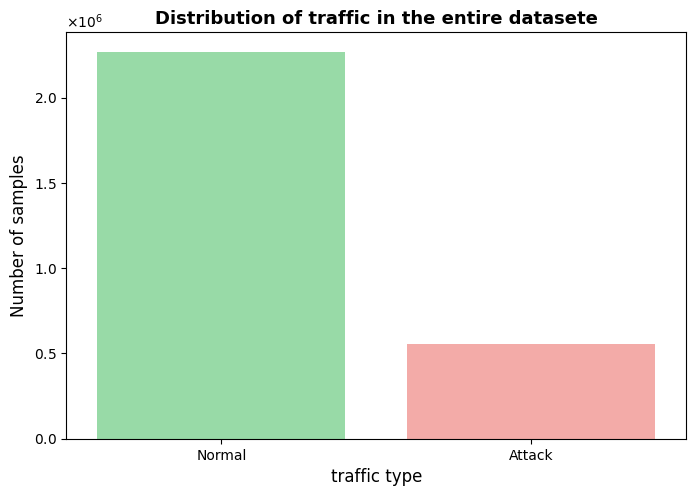

In [16]:
### plot distrtibution of Normal traffic and Attacks in the whole dataset 

#from matplotlib.ticker import StrMethodFormatter, MultipleLocator
#fmt = StrMethodFormatter("{x:,}")  #below lines are just another approach on formatting yaxis
#ax = plt.gca()
#locator = MultipleLocator(1*10**5)
#ax.yaxis.set_major_locator(locator)
#ax.yaxis.set_major_formatter(fmt)
plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)  # change def ScalarFormatter

sns.countplot(x="traffic type", data=all_data, palette=["g","r"])
#plt.title("Traffic type distribution in whole dataset")
plt.title("Distribution of traffic in the entire datasete")
plt.xlabel("traffic type")
plt.ylabel("Number of samples")
plt.savefig("distribution1.png", dpi=200, format='png')
plt.show()

# Traffic Undersampling

In [17]:
### Normal traffic greatly outweights Evil traffic. To avoid for the model to be biased towards one type of traffic, it has to be downsampled
all_data.loc[:, "traffic type"].value_counts()

## DOWNSAMPLING
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10, sampling_strategy=0.85) # equals traffic unless ratio is specified


all_data.drop(["traffic type"], axis=1, inplace=True) # temporarily rm the categorical column for underSampling

all_data_res, trf_type_res = rus.fit_resample(all_data, trf_type)

#all_datav2 = pd.concat([all_data_res, trf_type_res], join="inner")  # another way to join dataframe w/ series
all_datav2 = all_data_res.join(trf_type_res, how="inner")

all_datav2.shape # check if resulting DaraFrame valid

(1211327, 72)

/tmp/ipykernel_2770484/320147766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="traffic type", data=all_datav2, order=["Normal", "Attack"], palette=["g","r"])


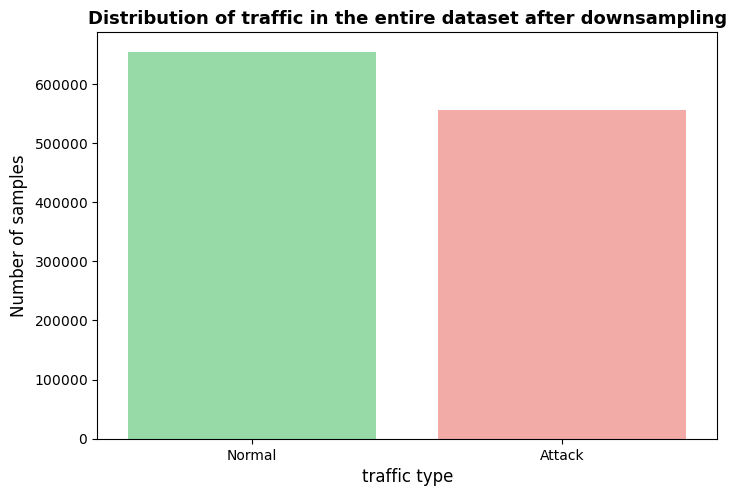

In [18]:
### show distribution chart after downsampling huge Normal traffic

plt.ticklabel_format(axis='y', useMathText=True, useOffset=False) # change def ScalarFormatter
sns.countplot(x="traffic type", data=all_datav2, order=["Normal", "Attack"], palette=["g","r"])

#plt.title("Traffic type distribution in whole dataset after random downsampling")
plt.title("Distribution of traffic in the entire dataset after downsampling")
plt.xlabel("traffic type")
plt.ylabel("Number of samples")
plt.savefig("distribution2.png", dpi=200, format='png')
plt.show()

In [19]:
## TESTING ONLY CELL 

#multi_trf_type = all_datav2["Label"]
#all_datav2.info()
#all_datav2_cp.drop(["Label", "traffic type"], axis=1, inplace=True)
# def _assert_all_finite(X):
#     """Like assert_all_finite, but only for ndarray."""
#     X = np.asanyarray(X)
#     # First try an O(n) time, O(1) space solution for the common case that
#     # everything is finite; fall back to O(n) space np.isfinite to prevent
#     # false positives from overflow in sum method.
#     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
#             and not np.isfinite(X).all()):
#         raise ValueError("Input contains NaN, infinity"
#                          " or a value too large for %r." % X.dtype)
# _assert_all_finite(all_datav2_cp) 

# Calculating Features‘s Importance

In [20]:
## feature selection phase - prepare data for RFC
lbls = all_datav2.loc[:, "Label"]
data_w_o_cat_attrs = all_datav2.iloc[:, :-2]

In [21]:
data_w_o_cat_attrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211327 entries, 540814 to 635678
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Destination Port             1211327 non-null  int64  
 1   Flow Duration                1211327 non-null  int64  
 2   Total Fwd Packets            1211327 non-null  int64  
 3   Total Backward Packets       1211327 non-null  int64  
 4   Total Length of Fwd Packets  1211327 non-null  int64  
 5   Total Length of Bwd Packets  1211327 non-null  int64  
 6   Fwd Packet Length Max        1211327 non-null  int64  
 7   Fwd Packet Length Min        1211327 non-null  int64  
 8   Fwd Packet Length Mean       1211327 non-null  float64
 9   Fwd Packet Length Std        1211327 non-null  float64
 10  Bwd Packet Length Max        1211327 non-null  int64  
 11  Bwd Packet Length Min        1211327 non-null  int64  
 12  Bwd Packet Length Mean       1211327 non-nu

In [22]:
## feature selection phase - let's use RFC on our data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10, n_jobs=-1) # 100 trees in forest

# fit random forest classifier on the dataset
rfc.fit(data_w_o_cat_attrs, lbls)

RandomForestClassifier(n_jobs=-1, random_state=10)

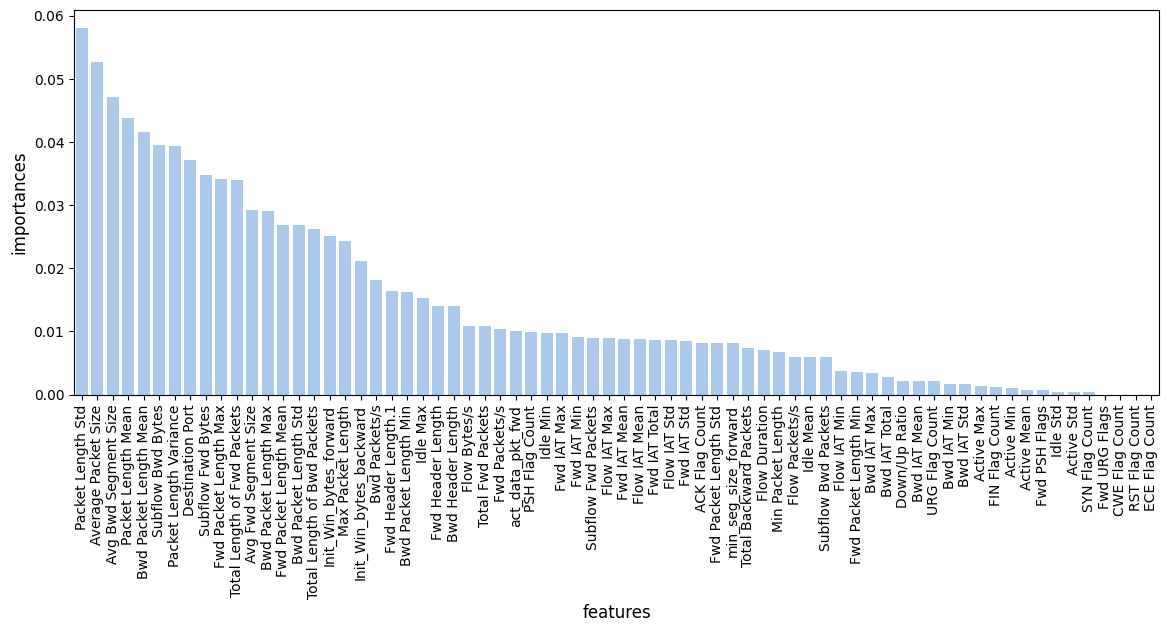

In [23]:
## plotting features' importance in the whole dataset graph 
# extract important features
score = np.round(rfc.feature_importances_,5)
importances = pd.DataFrame({'features':data_w_o_cat_attrs.columns,'importances':score})
importances = importances.sort_values('importances',ascending=False).set_index('features')

# plot importances
sns.barplot(x=importances.index, y="importances", data=importances, color="b")
plt.xticks(rotation="vertical")
plt.gcf().set_size_inches(14,5)
plt.savefig("importances.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.2)
plt.show()

#importances.plot.bar()  # alt way to achieve similar plot

In [24]:
## Let's leave only the most important features 
threshold = 0.001 # importance threshold

#bl_thresh = importances.loc[importances["importance"] < threshold]
bl_thresh = importances.loc[importances["importances"] < threshold]
print("there are {} features to delete, as they are below chosen threshold".format(bl_thresh.shape[0]))
print("these features are the following:")
feats_to_del = [feat for feat in bl_thresh.index]
print("\n".join(feats_to_del))

## removing these not important features 
all_datav2.drop(columns=feats_to_del, inplace=True) # dropping columns


there are 9 features to delete, as they are below chosen threshold
these features are the following:
Active Mean
Fwd PSH Flags
Idle Std
Active Std
SYN Flag Count
Fwd URG Flags
CWE Flag Count
RST Flag Count
ECE Flag Count


In [25]:
## check if DataFrame still valid 
all_datav2

Destination Port  Flow Duration  Total Fwd Packets  \
540814                 80        5216127                  3   
540815                 21             20                  1   
540816                 21             38                  1   
540817                 21             80                  1   
540818                 21             68                  1   
...                   ...            ...                ...   
525081                 53          30889                  2   
381970                443              3                  2   
1352358                53          72063                  1   
624893              53402              3                  2   
635678                 53          23808                  1   

         Total Backward Packets  Total Length of Fwd Packets  \
540814                        1                            0   
540815                        1                            0   
540816                        1                            0   
540817                        1                            0   
540818                        1                            0   
...                         ...                          ...   
525081                        2                           68   
381970                        0                           12   
1352358                       1                           44   
624893                        0                            0   
635678                        1                           53   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
540814                             0                      0   
540815                             0                      0   
540816                             0                      0   
540817                             0                      0   
540818                             0                      0   
...                              ...                    ...   
525081                           166                     34   
381970                             0                      6   
1352358                          184                     44   
624893                             0                      0   
635678                           117                     53   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
540814                       0                     0.0                    0.0   
540815                       0                     0.0                    0.0   
540816                       0                     0.0                    0.0   
540817                       0                     0.0                    0.0   
540818                       0                     0.0                    0.0   
...                        ...                     ...                    ...   
525081                      34                    34.0                    0.0   
381970                       6                     6.0                    0.0   
1352358                     44                    44.0                    0.0   
624893                       0                     0.0                    0.0   
635678                      53                    53.0                    0.0   

         ...  Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
540814   ...                    28960                 0                    32   
540815   ...                      227                 0                    32   
540816   ...                      227                 0                    32   
540817   ...                      227                 0                    32   
540818   ...                      227                 0                    32   
...      ...                      ...               ...                   ...   
525081   ...                       -1                 1                    20   
381970   ...                       -1                 1                    20   
1352358  ...            

# Detecting Highly Correlated Pairs

In [26]:
## feature selection phase - let's find highly correlated feature pairs 
# 去掉最后两列字符串（Label和traffic type）
all_datav2_trimmed = all_datav2.iloc[:, :-2]

# 计算相关矩阵
all_data_corr_mtrx = all_datav2_trimmed.corr()

# 输出相关矩阵
print(all_data_corr_mtrx)

                             Destination Port  Flow Duration  \
Destination Port                     1.000000      -0.175034   
Flow Duration                       -0.175034       1.000000   
Total Fwd Packets                   -0.003716       0.016300   
Total Backward Packets              -0.003302       0.014830   
Total Length of Fwd Packets          0.017333       0.070166   
...                                       ...            ...   
Active Max                          -0.045468       0.237431   
Active Min                          -0.028097       0.127197   
Idle Mean                           -0.153371       0.865211   
Idle Max                            -0.152365       0.880098   
Idle Min                            -0.151535       0.833243   

                             Total Fwd Packets  Total Backward Packets  \
Destination Port                     -0.003716               -0.003302   
Flow Duration                         0.016300                0.014830   
Total Fwd

In [27]:
## feature selection phase - let's find highly correlated feature pairs 
# all_data_corr_mtrx = all_datav2.corr()
# from sklearn.preprocessing import OneHotEncoder

# # 临时删除非数值型列
# non_numeric_columns = all_datav2.select_dtypes(exclude=['float64', 'int64']).columns
# all_data_numeric = all_datav2.drop(columns=non_numeric_columns)

# # 使用独热编码处理非数值型数据
# encoder = OneHotEncoder(sparse_output=False)
# non_numeric_data_encoded = encoder.fit_transform(all_datav2[non_numeric_columns])

# # 将编码后的数据与数值型数据合并
# all_data_encoded = pd.concat([all_data_numeric, pd.DataFrame(non_numeric_data_encoded)], axis=1)

# # 计算相关性矩阵
# all_data_corr_mtrx = all_data_encoded.corr()

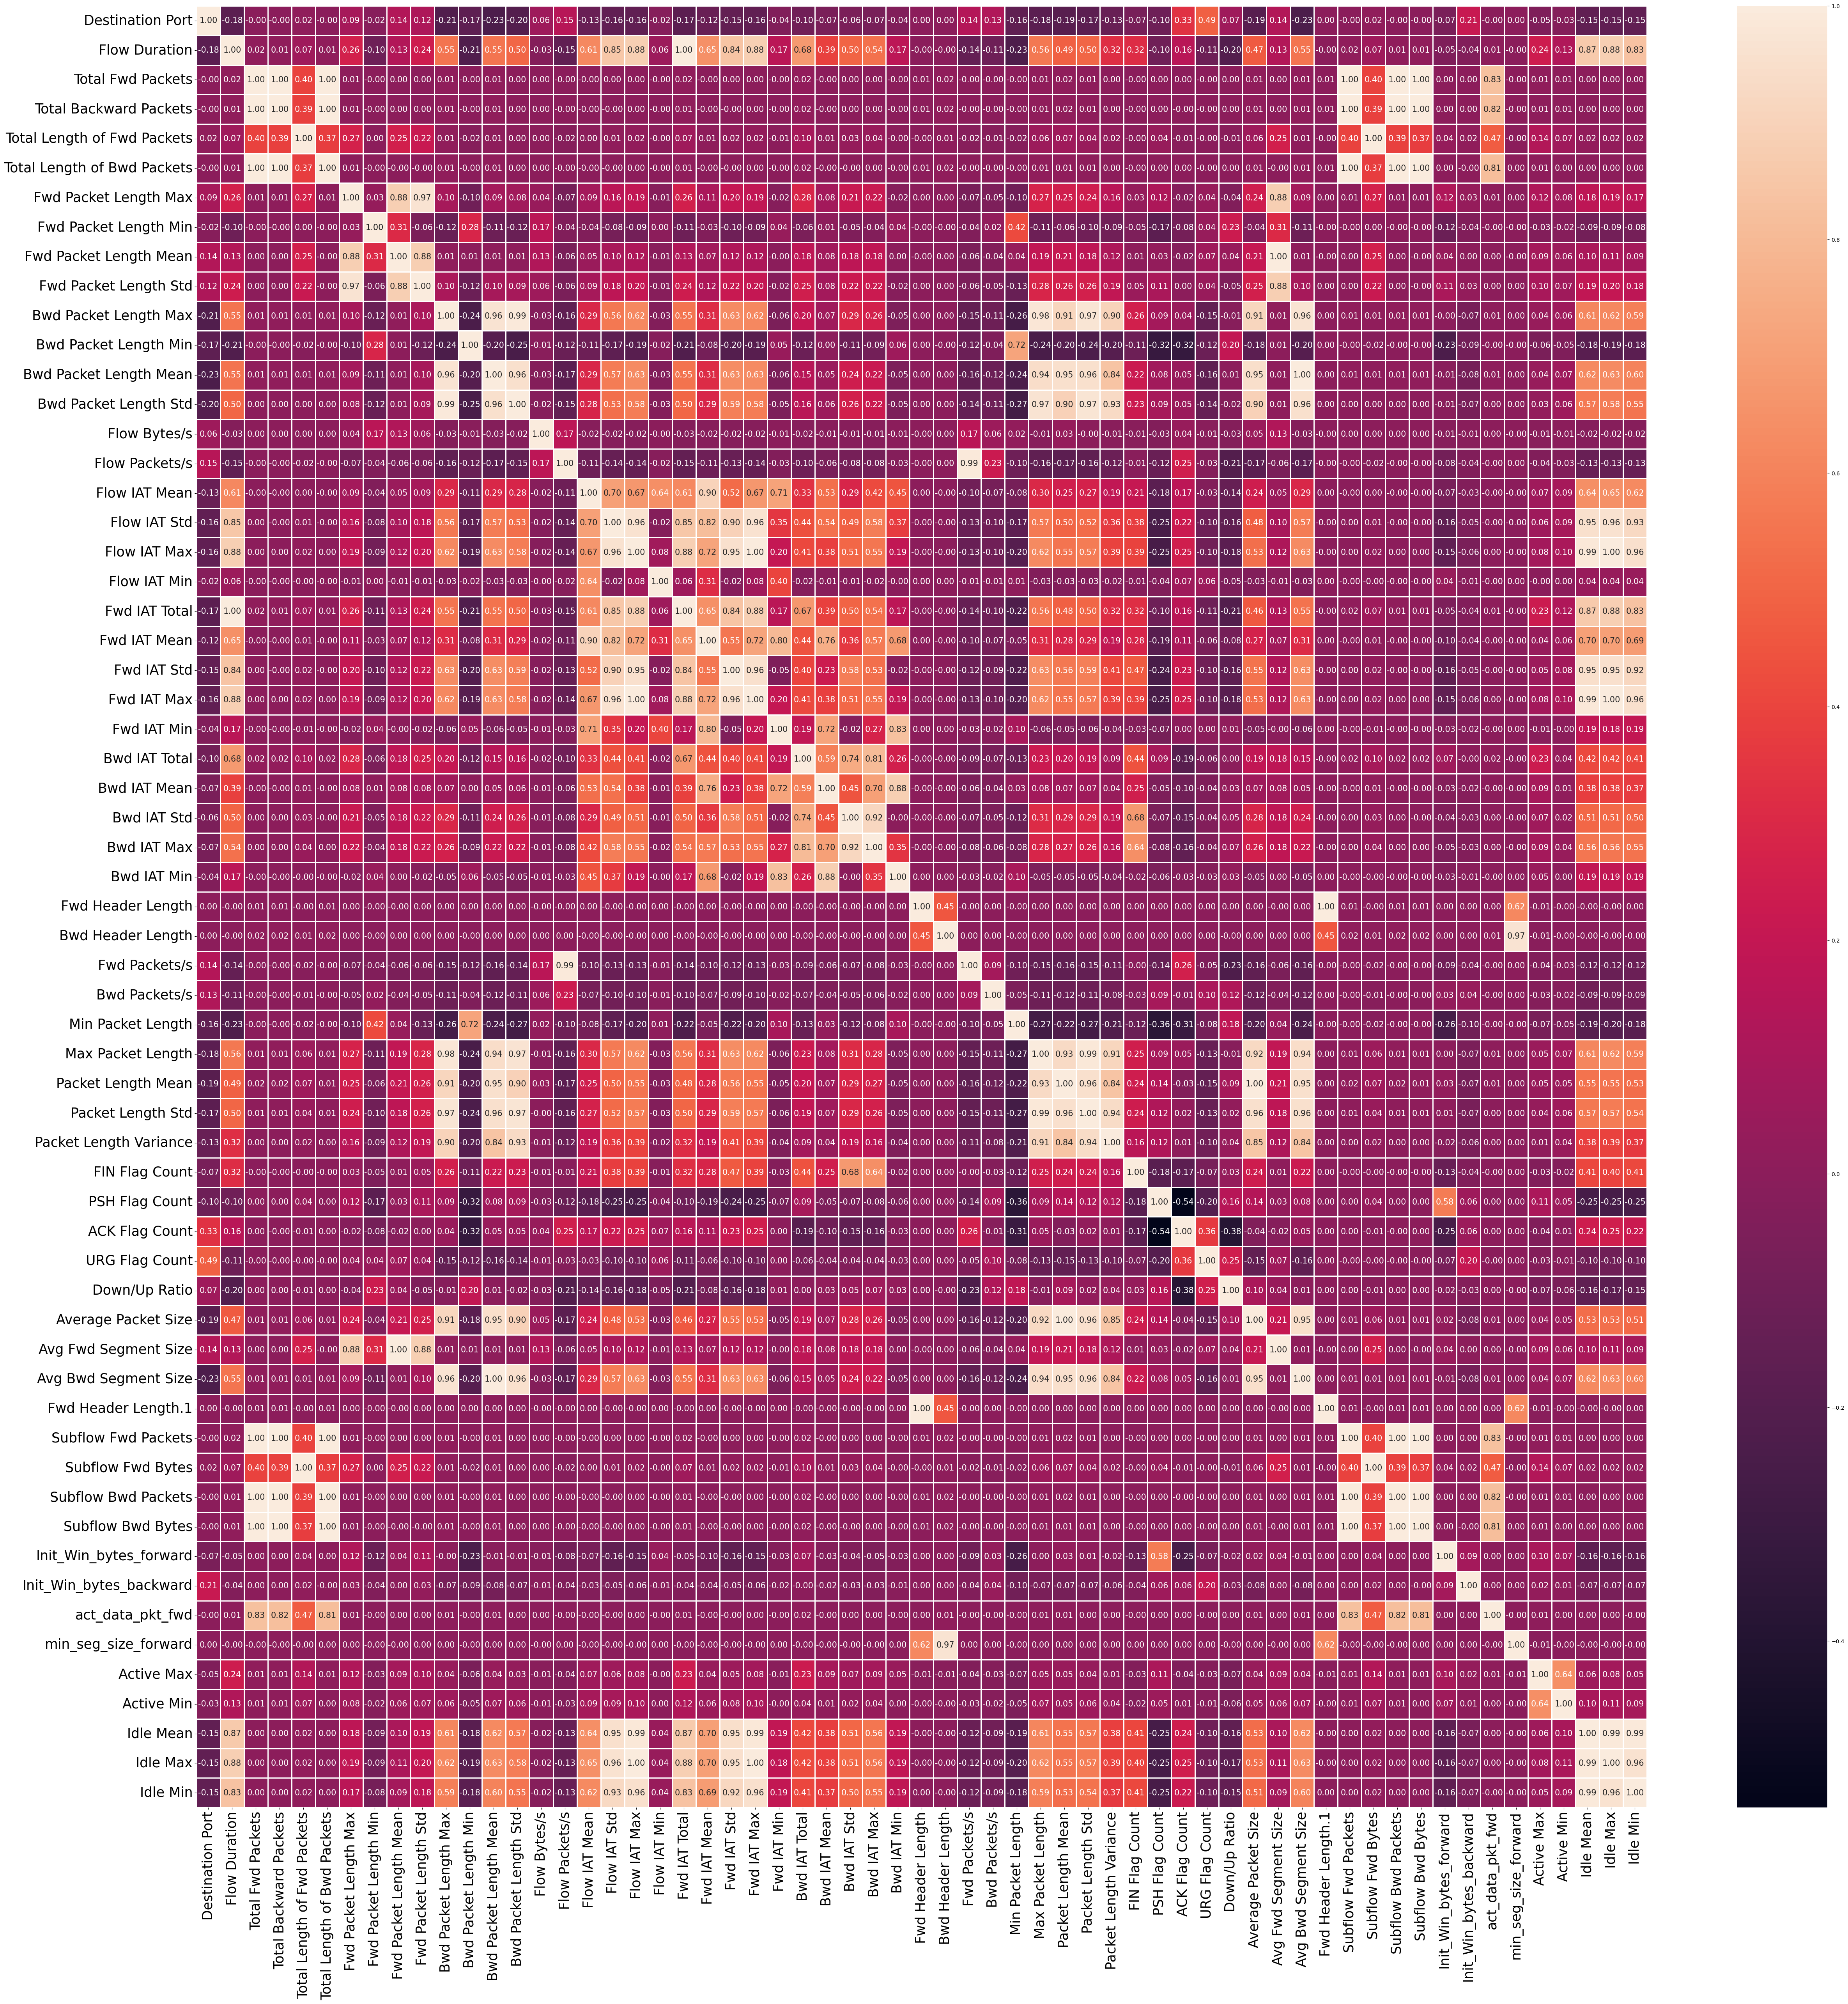

In [28]:
## plotting a correlation heatmap 

plt.gcf().set_size_inches(60, 60)
hm = sns.heatmap(all_data_corr_mtrx, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 25)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 25)
plt.savefig("corr_heatmap.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [29]:
# check matrix
all_data_corr_mtrx

Destination Port  Flow Duration  \
Destination Port                     1.000000      -0.175034   
Flow Duration                       -0.175034       1.000000   
Total Fwd Packets                   -0.003716       0.016300   
Total Backward Packets              -0.003302       0.014830   
Total Length of Fwd Packets          0.017333       0.070166   
...                                       ...            ...   
Active Max                          -0.045468       0.237431   
Active Min                          -0.028097       0.127197   
Idle Mean                           -0.153371       0.865211   
Idle Max                            -0.152365       0.880098   
Idle Min                            -0.151535       0.833243   

                             Total Fwd Packets  Total Backward Packets  \
Destination Port                     -0.003716               -0.003302   
Flow Duration                         0.016300                0.014830   
Total Fwd Packets                     1.000000                0.998555   
Total Backward Packets                0.998555                1.000000   
Total Length of Fwd Packets           0.395230                0.389193   
...                                        ...                     ...   
Active Max                            0.011977                0.010120   
Active Min                            0.007203                0.007074   
Idle Mean                             0.001438                0.000682   
Idle Max                              0.001545                0.000692   
Idle Min                              0.001288                0.000624   

                             Total Length of Fwd Packets  \
Destination Port                                0.017333   
Flow Duration                                   0.070166   
Total Fwd Packets                               0.395230   
Total Backward Packets                          0.389193   
Total Length of Fwd Packets                     1.000000   
...                                                  ...   
Active Max                                      0.135448   
Active Min                                      0.067069   
Idle Mean                                       0.020135   
Idle Max                                        0.022941   
Idle Min                                        0.016992   

                             Total Length of Bwd Packets  \
Destination Port                               -0.002624   
Flow Duration                                   0.012163   
Total Fwd Packets                               0.997623   
Total Backward Packets                          0.995166   
Total Length of Fwd Packets                     0.373901   
...                                                  ...   
Active Max                                      0.006043   
Active Min                                      0.004722   
Idle Mean                                       0.000649   
Idle Max                                        0.000643   
Idle Min                                        0.000623   

                             Fwd Packet Length Max  Fwd Packet Length Min  \
Destination Port                          0.092711              -0.015019   
Flow Duration                             0.260807              -0.103493   
Total Fwd Packets                         0.008396              -0.002218   
Total Backward Packets                    0.007972              -0.001827   
Total Length of Fwd Packets               0.267650               0.004163   
...                                            ...                    ...   
Active Max                                0.122742              -0.031745   
Active Min                                0.076377              -0.023257   
Idle Mean                                 0.178669              -0.087457   
Idle Max                                  0.187390              -0.089509   
Idle Min                                  0.165355              -0.083693   

    

In [30]:
## process correlation matrix, list highly correlated feature pairs 
def srt_corr(mtrx):
    corr_ustack = mtrx.unstack().abs()
    #corr_ustack
    corr_srted = corr_ustack.sort_values(ascending=False)
    return corr_srted
srt_corr(all_data_corr_mtrx)

Avg Bwd Segment Size    Bwd Packet Length Mean         1.000000e+00
Bwd Packet Length Mean  Avg Bwd Segment Size           1.000000e+00
Flow IAT Std            Flow IAT Std                   1.000000e+00
Flow IAT Max            Flow IAT Max                   1.000000e+00
Flow IAT Min            Flow IAT Min                   1.000000e+00
                                                           ...     
Fwd Packet Length Std   Total Length of Bwd Packets    1.934087e-06
                        Subflow Bwd Bytes              1.649607e-06
Subflow Bwd Bytes       Fwd Packet Length Std          1.649607e-06
min_seg_size_forward    Flow Bytes/s                   5.856477e-07
Flow Bytes/s            min_seg_size_forward           5.856477e-07
Length: 3721, dtype: float64

In [31]:
from collections import OrderedDict
thres_corr = 0.95
epoch=0
highly_corr = {"dummy": "dummy"}
feats_deled = []

all_data_corr_mtrx2 = all_data_corr_mtrx.copy()  # for easy
def add_to_dct(l, ft, ft2):
    try:
        l[ft].append(ft2)
    except KeyError:
        l[ft] = [ft2]

get_imp = lambda feat: importances.loc[feat][0]
srt_key = lambda elem: get_imp(elem[0])  # gets imp of first elem

def what_to_del(dct_srt):    
    to_del = []  #least imp feature
    for k, val in dct_srt.items():
        ## get all indexes lower than current k
        feats_lw_imp = importances[importances.index.slice_indexer(k)].index
        if set(val) - set(feats_lw_imp):  # feat k creates a corr pair w/ feature of higher importance --- delete feat k
            if k not in to_del: to_del.append(k)
        else:  # feat k creates a corr pair w/ features of lower importnace --- delete one w/ lowest imp 
            for ft in feats_lw_imp[::-1]:  # searching from least important
                if ft in val and ft not in to_del:
                    to_del.append(ft)
                    break  ## deleting first founud feat of lowest possible importance
    return to_del
        
            
while highly_corr:
    count = 0
    highly_corr.clear()
    for feats, val in srt_corr(all_data_corr_mtrx2).items():
        if val > thres_corr and feats[0] != feats[1]:
            count += 1
            add_to_dct(highly_corr, feats[0], feats[1])
    if not highly_corr: break  # no more highly corr pairs
    highly_corr_srt = OrderedDict(sorted(highly_corr.items(), key=srt_key))  # sorted based on imp

    to_del = what_to_del(highly_corr_srt)
    feats_deled += to_del
    epoch +=1 # first epoch will be 1 not 0! 
    print("there are {} higly correlated pairs in {} iteration".format(count, epoch))
    all_data_corr_mtrx2.drop(to_del, axis=1, inplace=True)
    all_data_corr_mtrx2.drop(to_del, axis=0, inplace=True)  # need to remove the feat from both cols and index

print("deleting: {} feature".format(len(feats_deled)))
print("finally deleted:\n"+ "\n".join(feats_deled))

there are 114 higly correlated pairs in 1 iteration
deleting: 25 feature
finally deleted:
Subflow Bwd Packets
Idle Mean
Flow Packets/s
Flow Duration
Total Backward Packets
min_seg_size_forward
Fwd Packet Length Std
Fwd IAT Std
Flow IAT Std
Flow IAT Max
Subflow Fwd Packets
Fwd IAT Max
Idle Min
Total Fwd Packets
Fwd Header Length
Max Packet Length
Total Length of Bwd Packets
Bwd Packet Length Std
Fwd Packet Length Mean
Bwd Packet Length Max
Total Length of Fwd Packets
Bwd Packet Length Mean
Packet Length Mean
Avg Bwd Segment Size
Average Packet Size


/tmp/ipykernel_2770484/3169371831.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  get_imp = lambda feat: importances.loc[feat][0]


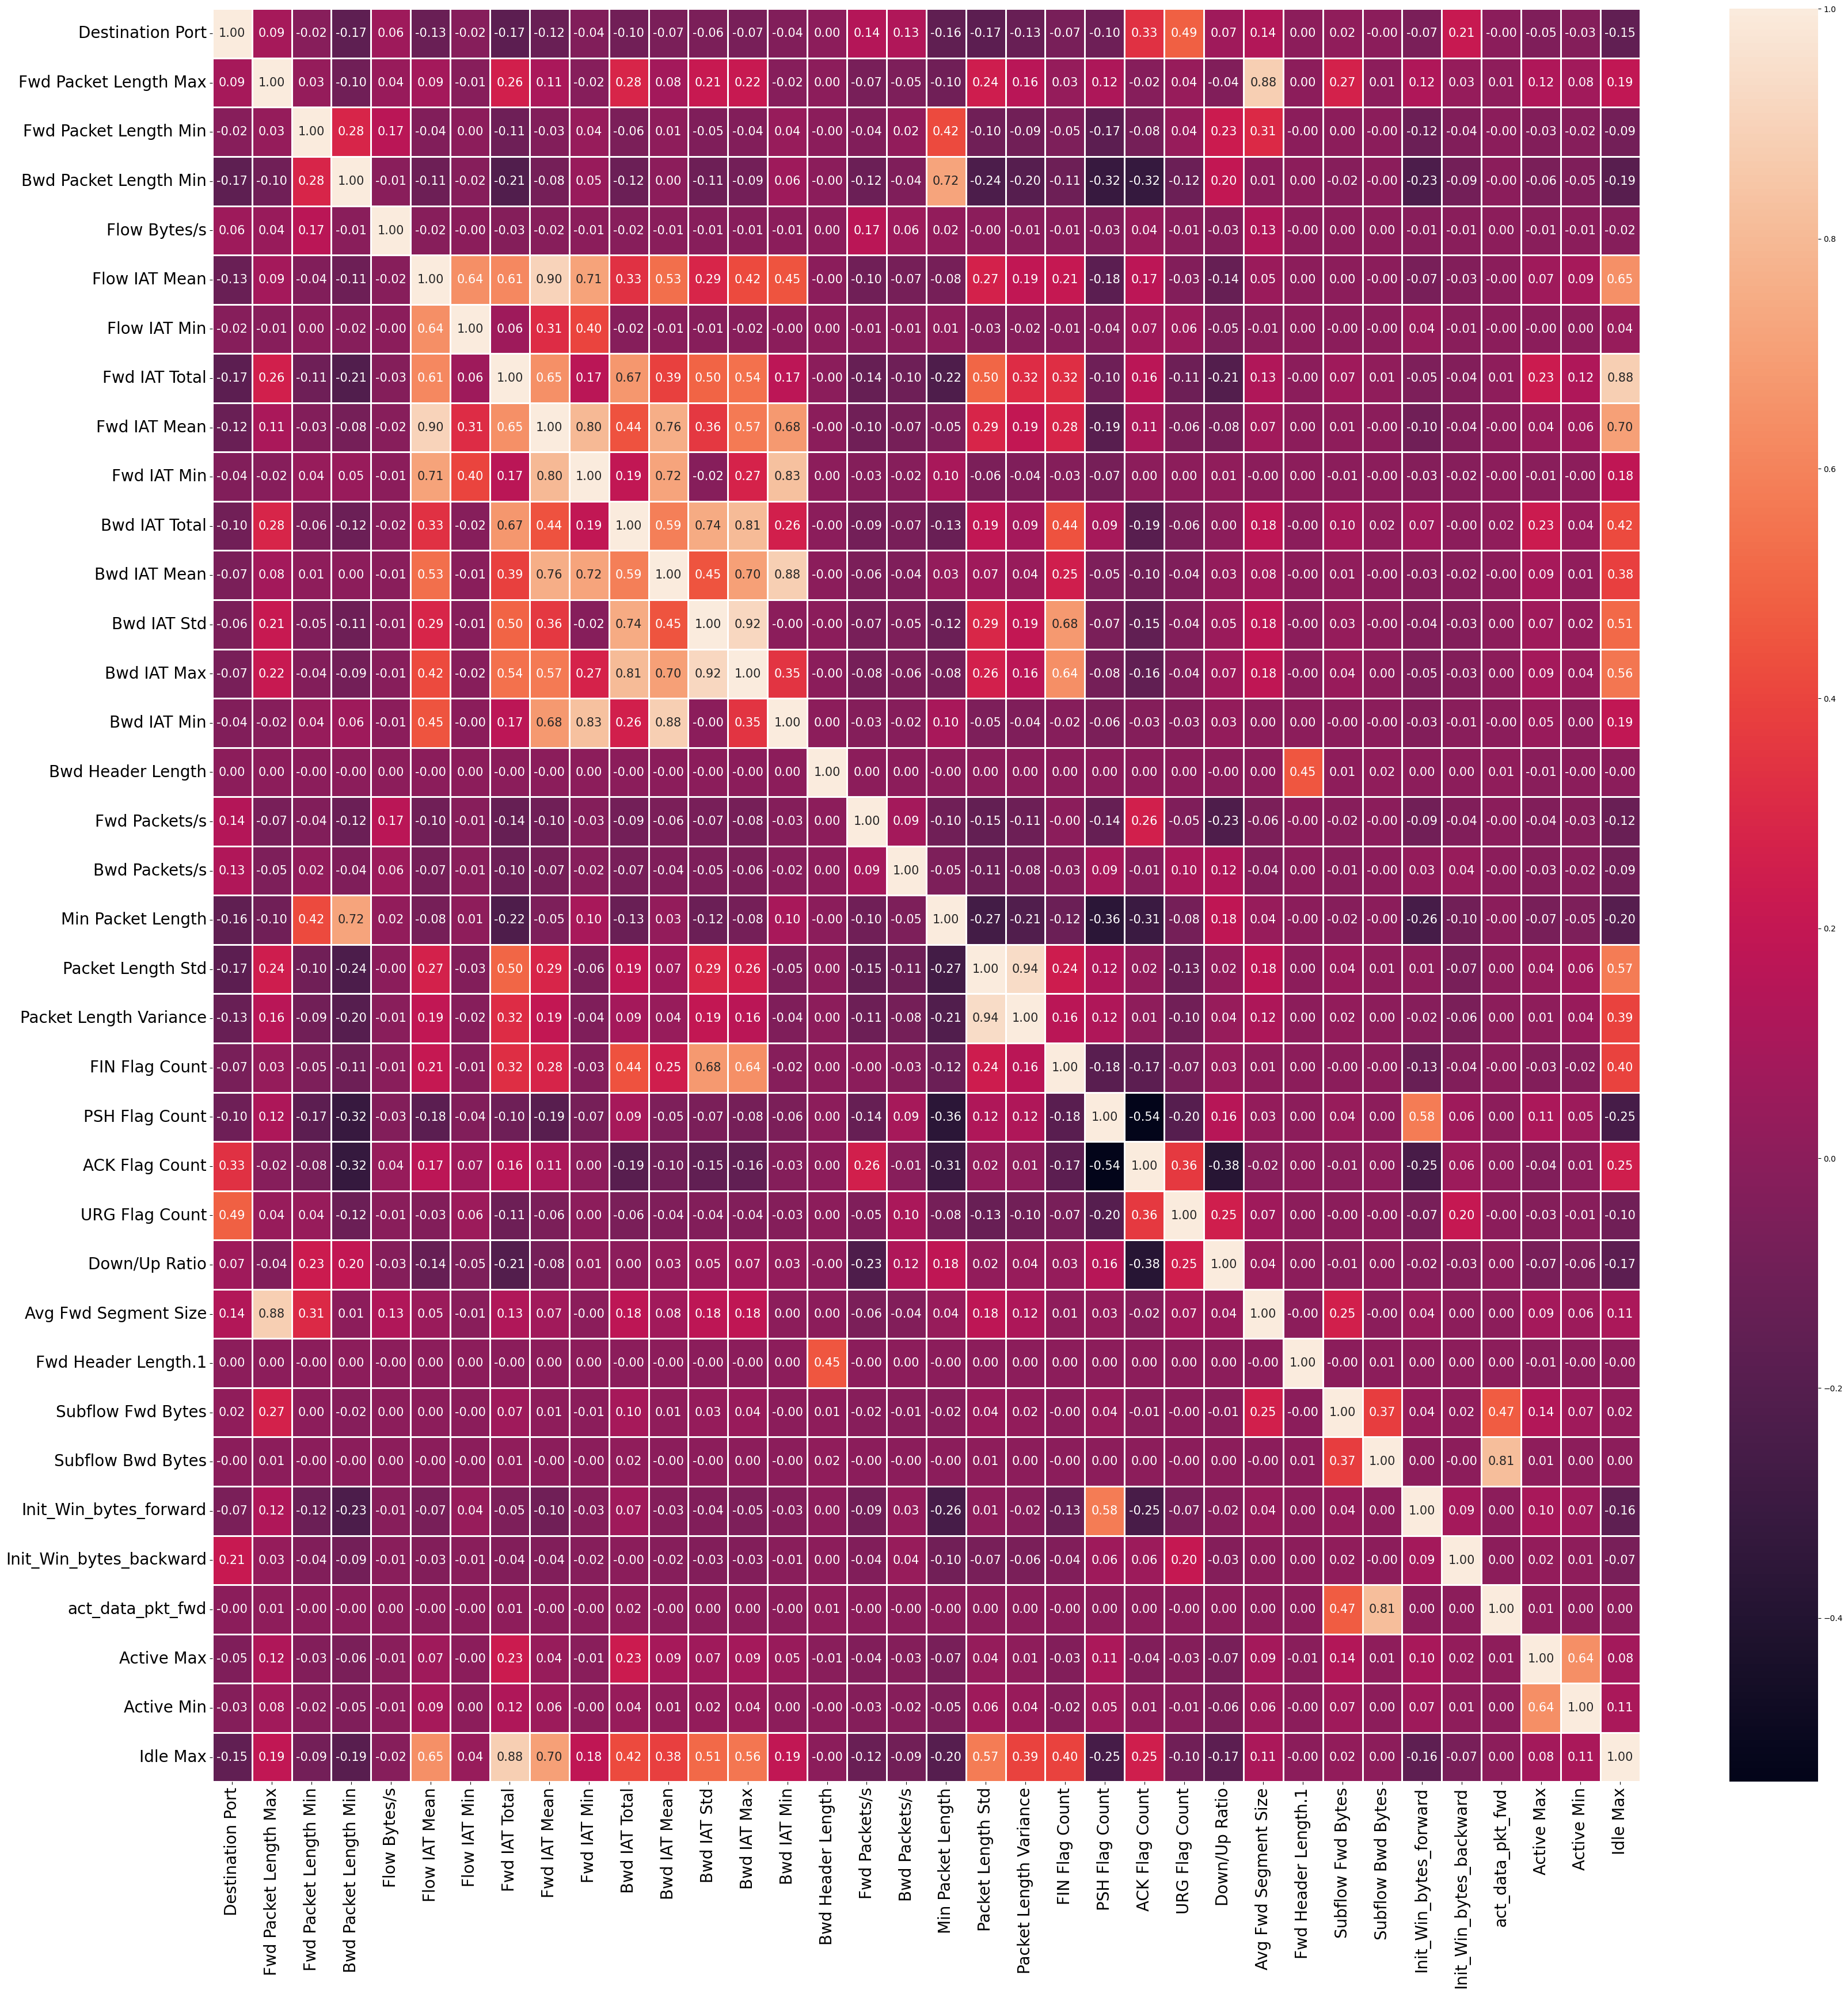

In [32]:
## plotting a correlation heatmap after removing highly correlated pairs

plt.gcf().set_size_inches(40, 40)
hm2 = sns.heatmap(all_data_corr_mtrx2, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm2.set_yticklabels(hm2.get_ymajorticklabels(), fontsize = 20)
hm2.set_xticklabels(hm2.get_xmajorticklabels(), fontsize = 20)
plt.savefig("corr_heatmap2.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [33]:
all_datav3 = all_datav2.copy() ## just for ease of cells executing 

all_datav3.drop(feats_deled, axis=1, inplace=True)

all_datav3_cp = all_datav3.copy()

all_datav3 # just check

Destination Port  Fwd Packet Length Max  Fwd Packet Length Min  \
540814                 80                      0                      0   
540815                 21                      0                      0   
540816                 21                      0                      0   
540817                 21                      0                      0   
540818                 21                      0                      0   
...                   ...                    ...                    ...   
525081                 53                     34                     34   
381970                443                      6                      6   
1352358                53                     44                     44   
624893              53402                      0                      0   
635678                 53                     53                     53   

         Bwd Packet Length Min  Flow Bytes/s  Flow IAT Mean  Flow IAT Min  \
540814                       0  0.000000e+00   1.738709e+06           124   
540815                       0  0.000000e+00   2.000000e+01            20   
540816                       0  0.000000e+00   3.800000e+01            38   
540817                       0  0.000000e+00   8.000000e+01            80   
540818                       0  0.000000e+00   6.800000e+01            68   
...                        ...           ...            ...           ...   
525081                      83  7.575512e+03   1.029633e+04             1   
381970                       0  4.000000e+06   3.000000e+00             3   
1352358                    184  3.163898e+03   7.206300e+04         72063   
624893                       0  0.000000e+00   3.000000e+00             3   
635678                     117  7.140457e+03   2.380800e+04         23808   

         Fwd IAT Total  Fwd IAT Mean  Fwd IAT Min  ...  Subflow Fwd Bytes  \
540814         5216127     2608063.5         1245  ...                  0   
540815               0           0.0            0  ...                  0   
540816               0           0.0            0  ...                  0   
540817               0           0.0            0  ...                  0   
540818               0           0.0            0  ...                  0   
...                ...           ...          ...  ...                ...   
525081               1           1.0            1  ...                 68   
381970               3           3.0            3  ...                 12   
1352358              0           0.0            0  ...                 44   
624893               3           3.0            3  ...                  0   
635678               0           0.0            0  ...                 53   

         Subflow Bwd Bytes  Init_Win_bytes_forward  Init_Win_bytes_backward  \
540814                   0                   29200                    28960   
540815                   0                     229                      227   
540816                   0                     229                      227   
540817                   0                     229                      227   
540818                   0                     229                      227   
...                    ...                     ...                      ...   
525081                 166                      -1                       -1   
381970                   0                       0                       -1   
1352358                184                      -1                       -1   
624893                   0                     368                       -1   
635678                 117                      -1                       -1   

         act_data_pkt_fwd  Active Max  Active Min  Idle Max        Label  \
540814                  0           0           0         0  FTP-Patator   
540815                  0           0           0         0  FTP-Patator   
540816                  0           0           0         0  FTP-Patator   
54081

# Quantile Scaling Numerical Features

In [34]:
## scaling numerical data using Quantile scaling
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=10) # number of quantiles can be set, default n_quantiles=1000

att_type = all_datav3.loc[:, "Label"]
bin_trff_type = all_datav3.loc[:, "traffic type"]
all_datav3.drop(["Label", "traffic type"], axis=1, inplace=True) ## drop categorical columns
all_data_scled = qt.fit_transform(all_datav3)

all_data_scled ## check 

array([[0.43043043, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00600601, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00600601, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13113113, 0.62712713, 0.8998999 , ..., 0.        , 0.        ,
        0.        ],
       [0.95313558, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13113113, 0.7002002 , 0.96396396, ..., 0.        , 0.        ,
        0.        ]])

In [35]:
### splitting dataset into training and test set 
from sklearn.model_selection import train_test_split

train_data, test_data, train_lbl, test_lbl  = train_test_split(all_data_scled, att_type, random_state=10, train_size=0.7)
## additional held-out validation set for evaluating neural nets predicting on upsampled training set --- the validation set need to be split b4 upsampling
neural_train_data, neural_validation, neural_train_lbl, neural_validation_lbl = train_test_split(train_data, train_lbl, random_state=10, train_size=0.8) ## will be shuffled in the same order as train_data above

train_bin_trff_lbl = train_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") 
neural_train_bin_trff_lbl = neural_train_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") ## train_lbl for upsampled neural nets
test_bin_trff_lbl = test_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") 
neural_validation_bin_trff_lbl = neural_validation_lbl.map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack") ## validation lbl for upsampled neural nets

In [36]:
## check the current distribution of each traffic type in training set
a = train_lbl.value_counts()
all_samples = a.sum()
print(a)
print("Total: {}".format(all_samples))
## TODO MAKE CHARTS from this for the training set only

Label
BENIGN              458225
DoS Hulk            161164
PortScan            111229
DDoS                 89694
DoS GoldenEye         7261
FTP-Patator           5521
DoS slowloris         4036
SSH-Patator           4021
DoS Slowhttptest      3850
Bot                   1377
Brute Force           1057
XSS                    448
Infiltration            24
Sql Injection           17
Heartbleed               4
Name: count, dtype: int64
Total: 847928


/tmp/ipykernel_2770484/1225309217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_lbl, order=order, palette=palette)


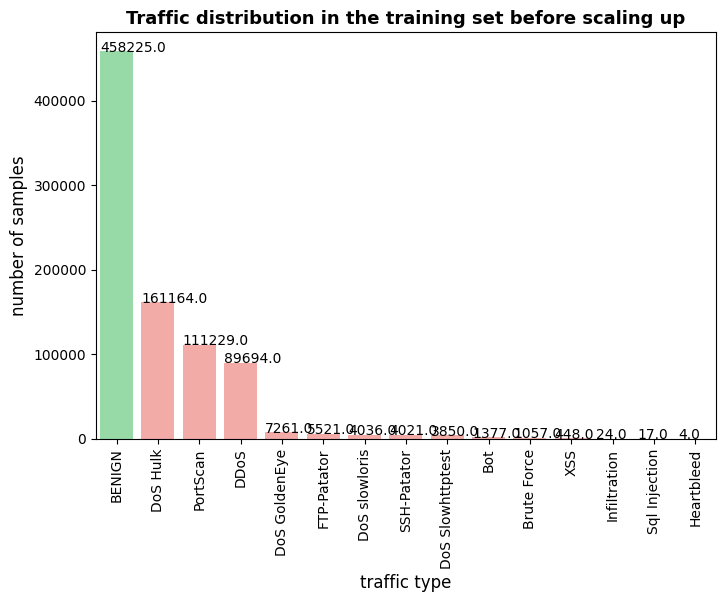

In [37]:
## traffic type distribution in training set before oversampling
order = a.index
palette = {}
for key in order:
    palette[key] = "g" if key == "BENIGN" else "r"
ax = sns.countplot(x=train_lbl, order=order, palette=palette)
plt.xticks(rotation="vertical")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
    
plt.title("Traffic distribution in the training set before scaling up")
plt.xlabel("traffic type")
plt.ylabel("number of samples")
plt.savefig("distribution_up1.png", dpi=200, format='png', bbox_inches = "tight")
plt.show()

# OverSampling training dataset

In [38]:
## TEST CELL ONLY
train_lbl.value_counts().loc["BENIGN"]

458225

In [45]:
## The distribution of each category is very imbalanced -- usign OverSampling to even the distribution
## oversampling only the training set so that not to leak information (important patterns) to the test dataset
from imblearn.over_sampling import SMOTE
from math import ceil
min_thresh = 0.005  # it is a percent of the whole traffic after underSampling

glob_cls_distr = None
def over_sample_new(y):
    global glob_cls_distr
    cls_distr = {}
    for trf_cls in np.unique(y):
        curr_size = a.loc[trf_cls]  # global a == train_lbl.value_counts()
        if (curr_size / all_samples) < min_thresh:
            cls_distr[trf_cls] = ceil(min_thresh * all_samples)
        else:
            cls_distr[trf_cls] = curr_size
    print("class distribution after over sampling:")
    glob_cls_distr = cls_distr
    print(glob_cls_distr)
    return cls_distr

def over_sample_bin(dct):
    sm = 0
    for key, val in dct.items():
        if key != "BENIGN":
            sm += val
        else: benign = val
    return {"Normal": benign, "Attack": sm}

#dct = {'FTP-Patator': 7935, 'SSH-Patator': 6057, 'DoS slowloris': 6057, 'DoS Slowhttptest': 6057, 'DoS Hulk': 230124, 'DoS GoldenEye': 10293, 'Heartbleed': 6057, 'Brute Force': 6057, 'XSS': 6057, 'Sql Injection': 6057, 'Infiltration': 6057, 'DDoS': 128025, 'PortScan': 158804, 'Bot': 6057, 'BENIGN': 654771}
smote = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=over_sample_new, n_jobs=-1)  # todo can resample w/ k_neigh only for heartbleed
#print(glob_cls_distr)

up_train_data, up_train_lbl = smote.fit_resample(train_data, train_lbl)

#up_train_bin_trff_lbl = up_train_lbl.map(lambda lbl: "Normalny" if lbl == "BENIGN" else "Atak")  # invalid way to oversample binary traffic

class distribution after over sampling:
{'BENIGN': 458225, 'Bot': 4240, 'Brute Force': 4240, 'DDoS': 89694, 'DoS GoldenEye': 7261, 'DoS Hulk': 161164, 'DoS Slowhttptest': 4240, 'DoS slowloris': 4240, 'FTP-Patator': 5521, 'Heartbleed': 4240, 'Infiltration': 4240, 'PortScan': 111229, 'SSH-Patator': 4240, 'Sql Injection': 4240, 'XSS': 4240}


/home/lly/apts/miniconda3/envs/python310/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [46]:
## same as above but done for the neural nets multiouput classification (need to held out additional validation set b4 upsampling)
neural_thresh = 0.005  # it is a percent of the whole traffic [neural_train_data] after underSampling

neural_glob_cls_distr = None
def over_sample_neural(y):
    all_samples = neural_train_lbl.value_counts().sum()
    global neural_glob_cls_distr
    cls_distr = {}
    for trf_cls in np.unique(y):
        curr_size = neural_train_lbl.value_counts().loc[trf_cls]
        if (curr_size / all_samples) < neural_thresh:
            cls_distr[trf_cls] = ceil(neural_thresh * all_samples)
        else:
            cls_distr[trf_cls] = curr_size
    print("class distribution after over sampling for neural nets:")
    neural_glob_cls_distr = cls_distr
    print(neural_glob_cls_distr)
    return cls_distr

neural_smote = SMOTE(random_state=10, k_neighbors=2, sampling_strategy=over_sample_neural, n_jobs=-1)  # todo can resample w/ k_neigh only for heartbleed
up_neural_train_data, up_neural_train_lbl = neural_smote.fit_resample(neural_train_data, neural_train_lbl)

class distribution after over sampling for neural nets:
{'BENIGN': 366384, 'Bot': 3392, 'Brute Force': 3392, 'DDoS': 71921, 'DoS GoldenEye': 5772, 'DoS Hulk': 128884, 'DoS Slowhttptest': 3392, 'DoS slowloris': 3392, 'FTP-Patator': 4394, 'Heartbleed': 3392, 'Infiltration': 3392, 'PortScan': 89171, 'SSH-Patator': 3392, 'Sql Injection': 3392, 'XSS': 3392}


/home/lly/apts/miniconda3/envs/python310/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [47]:
## upsampling minority data in the case of classification between of Normal / Evil traffic
## Attack samples should be equal to the sum of all attacks after upsampling in the previous step
#ratio = get_sum(glob_cls_distr) / a.loc["BENIGN"]  # minority class after resampling over majority class
ratio = over_sample_bin(glob_cls_distr)
#print(ratio)
smote_bin = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=ratio, n_jobs=-1)
up_train_bin_data, up_train_bin_trff_lbl = smote_bin.fit_resample(train_data, train_bin_trff_lbl)

/home/lly/apts/miniconda3/envs/python310/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [48]:
## same as above but done for neural nets binary classification (need to keep additional validation set b4 upsampling)
neural_ratio = over_sample_bin(neural_glob_cls_distr)
#print(ratio)
neural_smote_bin = SMOTE(random_state=10, k_neighbors=3, sampling_strategy=neural_ratio, n_jobs=-1)
up_neural_train_bin_data, up_neural_train_bin_trff_lbl = neural_smote_bin.fit_resample(neural_train_data, neural_train_bin_trff_lbl)

/home/lly/apts/miniconda3/envs/python310/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


/tmp/ipykernel_2770484/2045648411.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=up_train_lbl, order=order, palette=palette)


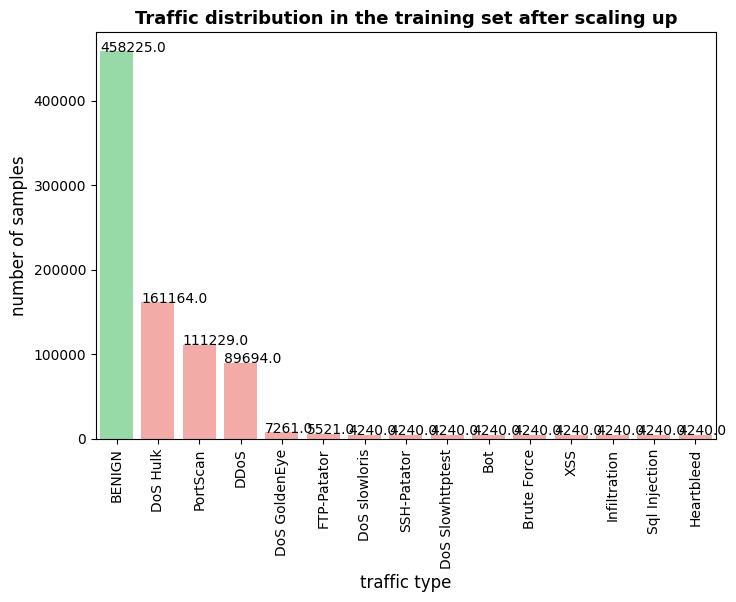

In [49]:
## traffic type distribution in training set after oversampling
order = ['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
       'FTP-Patator', 'DoS slowloris', 'SSH-Patator', 'DoS Slowhttptest',
       'Bot', 'Brute Force', 'XSS', 'Infiltration', 'Sql Injection',
       'Heartbleed']
palette = {}
for key in order:
    palette[key] = "g" if key == "BENIGN" else "r"
ax = sns.countplot(x=up_train_lbl, order=order, palette=palette)
plt.xticks(rotation="vertical")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
    
plt.title("Traffic distribution in the training set after scaling up")
plt.xlabel("traffic type")
plt.ylabel("number of samples")
plt.savefig("distribution_up2.png", dpi=200, format='png', bbox_inches = "tight")
plt.show()

# Encoding Categorical Features -- Two Approaches

In [50]:
## encoding labels using OneHotEncoder. Attack types should not imply any hierachical relation between them 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

test_rshped = test_lbl.values.reshape(-1,1)
train_rshped = train_lbl.values.reshape(-1,1)
up_train_rshped = up_train_lbl.values.reshape(-1,1)
up_neural_train_rshped = up_neural_train_lbl.values.reshape(-1,1)
neural_validation_rshped = neural_validation_lbl.values.reshape(-1,1)


# cats = np.array(['BENIGN', 'DoS Hulk', 'DDoS', 'PortScan', 'DoS slowloris',
#        'Brute Force', 'DoS GoldenEye', 'Bot', 'DoS Slowhttptest',
#        'SSH-Patator', 'FTP-Patator', 'XSS', 'Sql Injection',
#        'Infiltration', 'Heartbleed'])
ohenc = OneHotEncoder()
lenc = LabelEncoder()

test_lbl_enc = ohenc.fit_transform(test_rshped).toarray()  # one-hot encoded test set lbls
train_lbl_enc = ohenc.fit_transform(train_rshped).toarray()  # one-hot encoded train set labels
up_train_lbl_enc = ohenc.fit_transform(up_train_rshped).toarray()  # one-hot encoded upsampled train set lbls
up_neural_train_lbl_enc = ohenc.fit_transform(up_neural_train_rshped).toarray()  # one-hot encoded upsampled train set lbls for neural nets predicting upsampled traffic
neural_validation_lbl_enc = ohenc.fit_transform(neural_validation_rshped).toarray()  # one-hot encoded neural nets validation set for multiouput classification

test_bin_trff_lbll_enc = lenc.fit_transform(test_bin_trff_lbl)  # label encoded test set binary lbls
train_bin_trff_lbll_enc = lenc.fit_transform(train_bin_trff_lbl) # label encoded train set binary lbls
up_train_bin_trff_lbl_enc = lenc.fit_transform(up_train_bin_trff_lbl)  # label encoded upsampled train set binary lbls
up_neural_train_bin_trff_lbl_enc = lenc.fit_transform(up_neural_train_bin_trff_lbl)  # label encoded upsampled train set binary lbls for neural nets predicting upsampled traffic
neural_validation_bin_trff_lbl_enc = lenc.fit_transform(neural_validation_bin_trff_lbl)  # label encoded neural nets validation set for binary classification

In [51]:
## saving output for future use 
pd.DataFrame(train_data).to_csv("train_set_df.csv", index=False)  # raw train set
pd.DataFrame(up_train_data).to_csv("upsmpl_train_set_df.csv", index=False) # upsampled train set for multi-output classification
pd.DataFrame(up_neural_train_data).to_csv("upsmpl_neural_train_set_df.csv", index=False) # upsampled train set for multi-output classification for neural nets
pd.DataFrame(up_train_bin_data).to_csv("upsmpl_train_bin_set_df.csv", index=False)  # upsampled train set for binary classification
pd.DataFrame(up_neural_train_bin_data).to_csv("upsmpl_neural_train_bin_set_df.csv", index=False)  # upsampled train set for binary classification for neural nets
pd.DataFrame(test_data).to_csv("test_set_df.csv", index=False)  #raw test set

train_lbl.to_csv("train_lbl.csv")  # raw labels for multi-output classification
up_train_lbl.to_csv("upsmpl_train_lbl.csv")  # raw lbls for upsampled multi-output classification
pd.DataFrame(data=train_lbl_enc).to_csv("train_lbl_enc.csv", index=False) # one-hot encoded labels for multi-output classification
pd.DataFrame(data=up_train_lbl_enc).to_csv("upsmpl_train_lbl_enc.csv", index=False) # one-hot encoded lbls for upsampled multi-output classification
pd.DataFrame(data=up_neural_train_lbl_enc).to_csv("upsmpl_neural_train_lbl_enc.csv", index=False) # one-hot encoded lbls for upsampled multi-output classification 4 neural

test_lbl.to_csv("test_lbl.csv")  # raw test labels for multi-output classification
pd.DataFrame(data=test_lbl_enc).to_csv("test_lbl_enc.csv", index=False)  # one-hot encoded test lbls for multi-ouput classification

train_bin_trff_lbl.to_csv("train_bin_trff_lbl.csv")  # raw lbls for binary classification
up_train_bin_trff_lbl.to_csv("upsmpl_train_bin_trff_lbl.csv")  # raw lbls for upsampled binary classification
pd.DataFrame(data=train_bin_trff_lbll_enc).to_csv("train_bin_trff_lbl_enc.csv", index=False)  # label encoded lbls for binary classification
pd.DataFrame(data=up_train_bin_trff_lbl_enc).to_csv("upsmpl_train_bin_trff_lbl_enc.csv", index=False)  # label encoded lbls for upsampled binary classification
pd.DataFrame(data=up_neural_train_bin_trff_lbl_enc).to_csv("upsmpl_neural_train_bin_trff_lbl_enc.csv", index=False)  # label encoded lbls for upsampled binary classification 4 neural

test_bin_trff_lbl.to_csv("test_bin_trff_lbl.csv")  # raw test lbls for binary classification
pd.DataFrame(data=test_bin_trff_lbll_enc).to_csv("test_bin_trff_lbl_enc.csv", index=False)  # label encoded test lbls for binary classification 

pd.DataFrame(neural_validation).to_csv("neural_validation.csv", index=False)  # validation set for neural nets predicting on upsampled training set
pd.DataFrame(data=neural_validation_bin_trff_lbl_enc).to_csv("neural_validation_bin_trff_lbl_enc.csv", index=False)  # label encoded validation set lbl 4 neural 4 binary 
pd.DataFrame(data=neural_validation_lbl_enc).to_csv("neural_validation_lbl_enc", index=False)  # one-hot encoded validation set lbl 4 neural 4 multioutput classification